# Exploration 11
---
## 주식 예측

## 1. 시계열 데이터 준비
---
- 칼럼 종류 : 
- 날짜별로 시작가, 최고가, 최저가, 종가, 수정종가, 거래량 중 종가만 사용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME') + '/aiffel/stock_prediction/data/005930.KS.csv'
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
ts = df['Close']

ts.head()

Date
2020-05-18    48800.0
2020-05-19    50300.0
2020-05-20    50000.0
2020-05-21    49950.0
2020-05-22    48750.0
Name: Close, dtype: float64

In [2]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3')

슝=3


In [3]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


## 2. 각종 전처리 수행
---
- 결측치 처리
- 로그 변환

In [4]:
ts[ts.isna()]  # 결측치 확인

Series([], Name: Close, dtype: float64)

_결측치는 없는 것으로 확인되었다._

In [5]:
# 로그함수 변환
ts_log = np.log(ts)

## 3. 시계열 안정성 분석
---
- 정성적 그래프 분석
- 정량적 ADF Test
- 시계열 분해
- Residual 안정성 확인

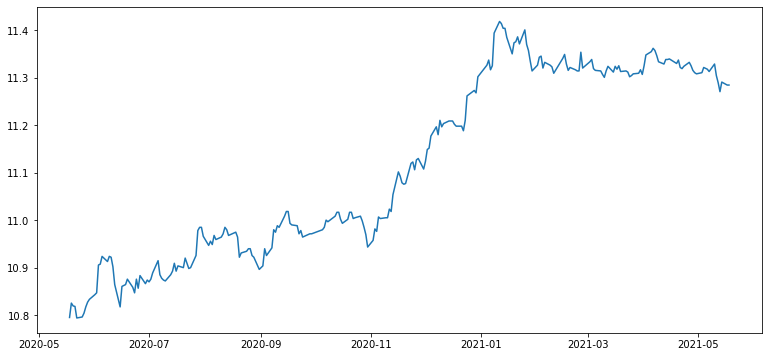

In [6]:
# Stationary 여부 확인
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts_log)

In [7]:
# log 변환 전
augmented_dickey_fuller_test(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -1.222649
p-value                          0.663778
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [8]:
# log 변환 후
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


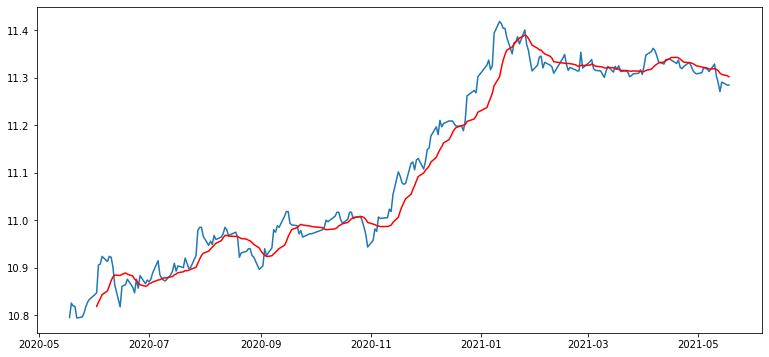

In [9]:
# 1-2. Moving Average 제거 - 추세(Trend) 상쇄하기
# rolling mean을 구해 ts_log에서 빼주는 방법
moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [10]:
ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
ts_log_moving_avg.head(15)

Date
2020-05-18         NaN
2020-05-19         NaN
2020-05-20         NaN
2020-05-21         NaN
2020-05-22         NaN
2020-05-25         NaN
2020-05-26         NaN
2020-05-27         NaN
2020-05-28         NaN
2020-05-29         NaN
2020-06-01         NaN
2020-06-02    0.028599
2020-06-03    0.077956
2020-06-04    0.072953
2020-06-05    0.080606
Name: Close, dtype: float64

In [11]:
ts_log_moving_avg.dropna(inplace=True)
ts_log_moving_avg.head(15)

Date
2020-06-02    0.028599
2020-06-03    0.077956
2020-06-04    0.072953
2020-06-05    0.080606
2020-06-08    0.061862
2020-06-09    0.061925
2020-06-10    0.049636
2020-06-11    0.021446
2020-06-12   -0.019996
2020-06-15   -0.066141
2020-06-16   -0.025267
2020-06-17   -0.024961
2020-06-18   -0.024494
2020-06-19   -0.010603
2020-06-22   -0.023697
Name: Close, dtype: float64

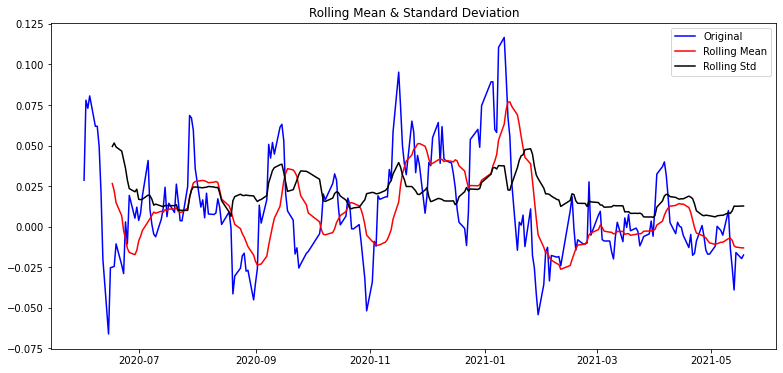

In [12]:
plot_rolling_statistics(ts_log_moving_avg)

In [13]:
augmented_dickey_fuller_test(ts_log_moving_avg)

Results of Dickey-Fuller Test:
Test Statistic                  -4.163469
p-value                          0.000759
#Lags Used                       0.000000
Number of Observations Used    238.000000
Critical Value (1%)             -3.458128
Critical Value (5%)             -2.873762
Critical Value (10%)            -2.573283
dtype: float64


In [14]:
# window = 6
moving_avg_6 = ts_log.rolling(window=6).mean()
ts_log_moving_avg_6 = ts_log - moving_avg_6
ts_log_moving_avg_6.dropna(inplace=True)
augmented_dickey_fuller_test(ts_log_moving_avg_6)

Results of Dickey-Fuller Test:
Test Statistic                  -4.800754
p-value                          0.000054
#Lags Used                       5.000000
Number of Observations Used    239.000000
Critical Value (1%)             -3.458011
Critical Value (5%)             -2.873710
Critical Value (10%)            -2.573256
dtype: float64


In [15]:
# window = 3
moving_avg_3 = ts_log.rolling(window=3).mean()
ts_log_moving_avg_3 = ts_log - moving_avg_3
ts_log_moving_avg_3.dropna(inplace=True)
augmented_dickey_fuller_test(ts_log_moving_avg_3)

Results of Dickey-Fuller Test:
Test Statistic                -1.086694e+01
p-value                        1.399722e-19
#Lags Used                     1.000000e+00
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64


In [16]:
# window = 365
moving_avg_365 = ts_log.rolling(window=3).mean()
ts_log_moving_avg_365 = ts_log - moving_avg_365
ts_log_moving_avg_365.dropna(inplace=True)
augmented_dickey_fuller_test(ts_log_moving_avg_365)

Results of Dickey-Fuller Test:
Test Statistic                -1.086694e+01
p-value                        1.399722e-19
#Lags Used                     1.000000e+00
Number of Observations Used    2.460000e+02
Critical Value (1%)           -3.457215e+00
Critical Value (5%)           -2.873362e+00
Critical Value (10%)          -2.573070e+00
dtype: float64


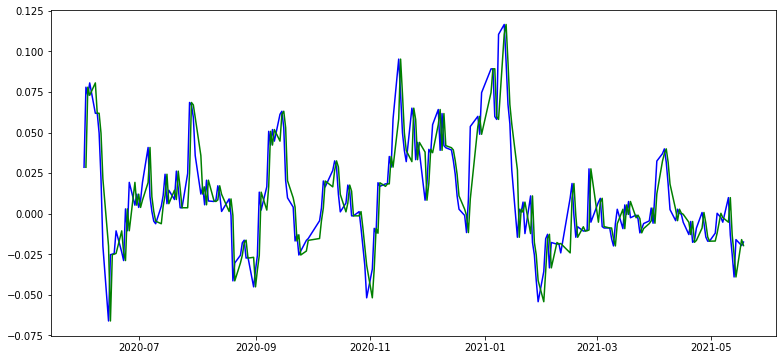

In [17]:
# 원본시계열(blue)과 시프트한 시계열(green)
ts_log_moving_avg_shift = ts_log_moving_avg.shift()

plt.plot(ts_log_moving_avg, color='blue')
plt.plot(ts_log_moving_avg_shift, color='green')

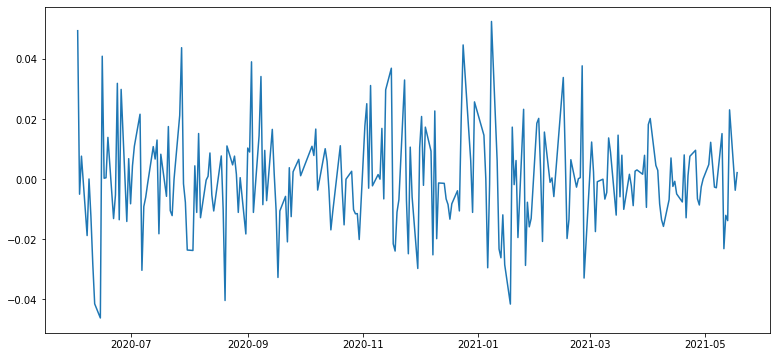

In [18]:
# 원본 시계열에서 시프트한 시계열을 뺀 값
ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
ts_log_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_log_moving_avg_diff)

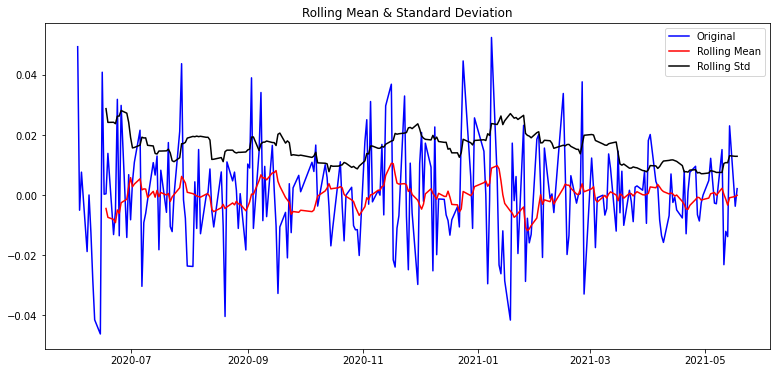

In [19]:
plot_rolling_statistics(ts_log_moving_avg_diff)

In [20]:
augmented_dickey_fuller_test(ts_log_moving_avg_diff)

Results of Dickey-Fuller Test:
Test Statistic                -1.546028e+01
p-value                        2.711476e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64


### 2. 시계열 분해 이용

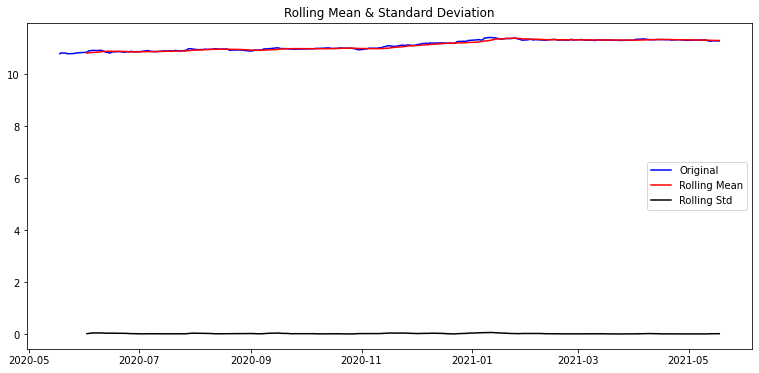

Results of Dickey-Fuller Test:
Test Statistic                  -1.383525
p-value                          0.590149
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [21]:
# 정성적 그래프 분석
plot_rolling_statistics(ts_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)

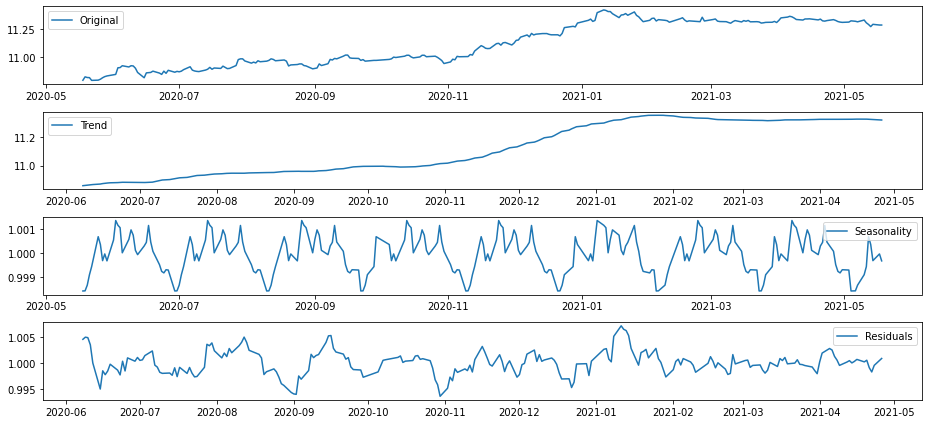

In [22]:
#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [23]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.187586e+00
p-value                        6.234854e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.100000e+02
Critical Value (1%)           -3.461879e+00
Critical Value (5%)           -2.875404e+00
Critical Value (10%)          -2.574159e+00
dtype: float64


## 4. 학습, 테스트 데이터 셋 생성
---
- 학습, 테스트 데이터셋 분리


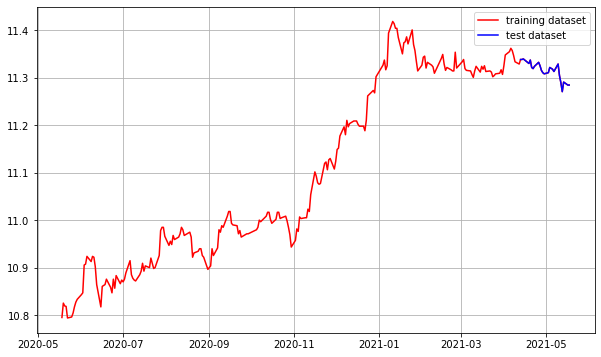

In [24]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [25]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2020-05-18    10.795486
2020-05-19    10.825760
Name: Close, dtype: float64
(225,)
(25,)


## 5. 적정 ARIMA 모수 찾기
---
- ACF, PACF 그려보기 -> p, q 구하기
- 차분 안정성 확인 -> d 구하기

_일반적으로 p + q < 2, p * q = 0_

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


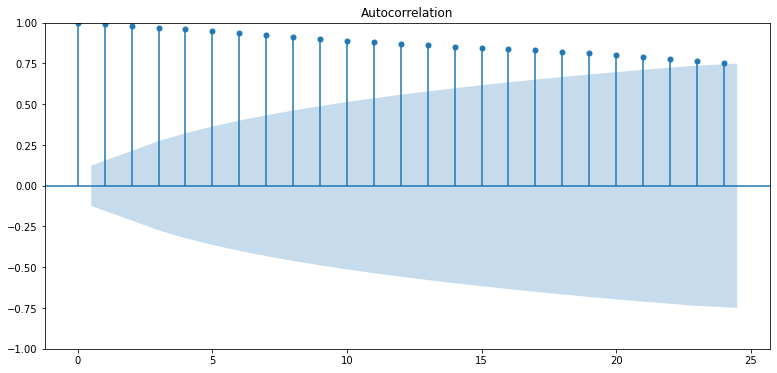

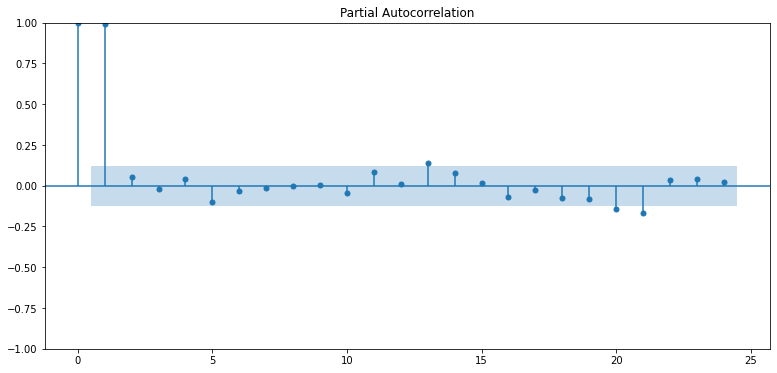

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기a
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

PACF 그래프를 확인했을 때 1 이후에 0으로 수렴하는 것으로 보아 `p = 1` 로 설정하는 것이 적절해 보인다. <br>
따라서 일반적으로 설정하는 __p * q = 0__ 을 만족시키기 위해서 `q = 0` 으로 둘 수 있다.

차분에 해당하는 d 값을 구하기 위해 데이터를 1차, 2차에 걸쳐 미분해보자.

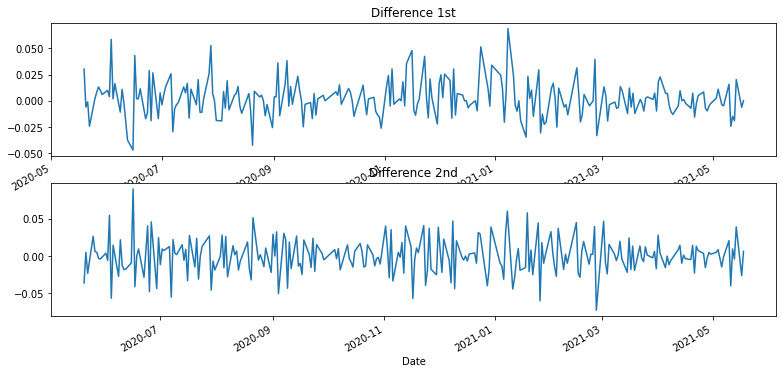

Difference 1st
-------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                -1.553699e+01
p-value                        2.183738e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.480000e+02
Critical Value (1%)           -3.456996e+00
Critical Value (5%)           -2.873266e+00
Critical Value (10%)          -2.573019e+00
dtype: float64


Difference 2nd
-------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                -1.029320e+01
p-value                        3.525823e-18
#Lags Used                     7.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64


In [27]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]


# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]

# 그래프 확인하기
plt.subplot(2,1,1)
diff_1.plot(title='Difference 1st')
plt.subplot(2,1,2)
diff_2.plot(title='Difference 2nd')
plt.show()


# ADF Test
print("Difference 1st")
print("-------------------------------------------")
augmented_dickey_fuller_test(diff_1)
print("\n")
print("Difference 2nd")
print("-------------------------------------------")
augmented_dickey_fuller_test(diff_2)





안정성을 판단함에 있어 p-value 값을 참고해야 하는지에 대한 개념이 명확하지 않아 ACF, PACF를 참고하여 다시 확인해보자.

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


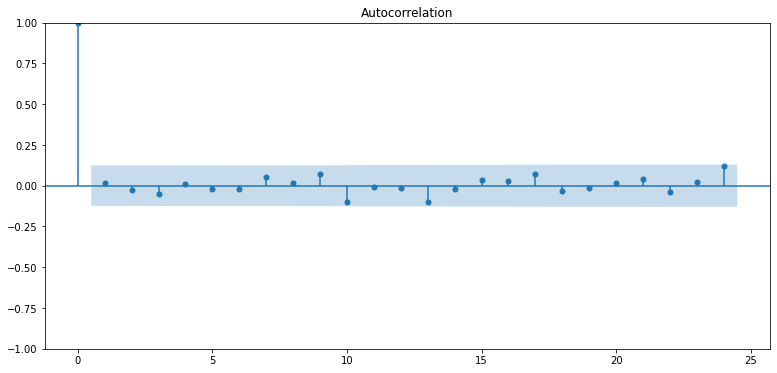

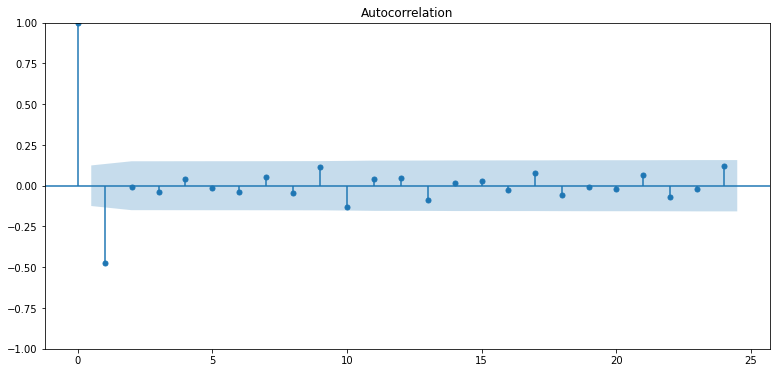

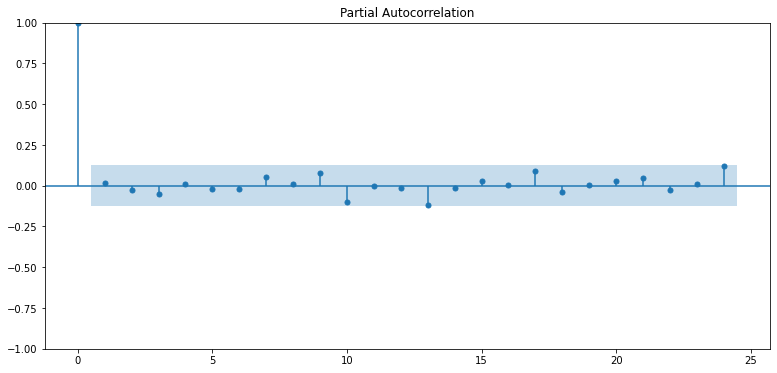

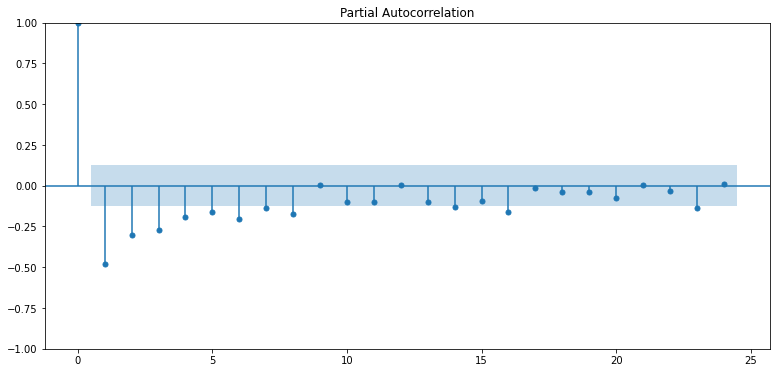

In [28]:
# 1차 차분 구하기

plot_acf(diff_1)   # ACF : Autocorrelation 그래프 그리기
plot_acf(diff_2)
plot_pacf(diff_1)  # PACF : Partial Autocorrelation 그래프 그리기
plot_pacf(diff_2)
plt.show()



위 그래프를 확인 했을 때 1차 미분이 2차 미분에 비하여 더 0에 잘 수렴하는 것을 확인할 수 있다. 따라서 d = 1 로 설정하여 학습을 진행해보자.

## 6. ARIMA 모델 훈련과 테스트
---
- ARIMA 모델 빌드와 훈련
- 모델 테스트 및 플로팅
- 최종 예측 모델 정확도 측정(MAPE)

In [29]:
from statsmodels.tsa.arima.model import ARIMA
# Build Model
model = ARIMA(train_data, order=(1, 0, 1))  
fitted_m = model.fit() 

print(fitted_m.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 583.370
Date:                Thu, 17 Feb 2022   AIC                          -1158.741
Time:                        12:06:07   BIC                          -1145.076
Sample:                             0   HQIC                         -1153.226
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0896      0.127     87.360      0.000      10.841      11.338
ar.L1          0.9942      0.006    157.934      0.000       0.982       1.007
ma.L1          0.0392      0.063      0.623      0.5

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


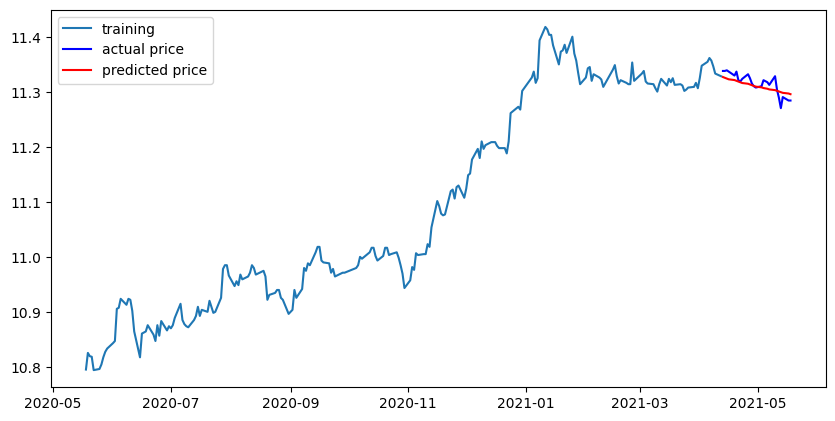

In [30]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1057119.8161340475
MAE:  850.8270312480739
RMSE:  1028.1633217218202
MAPE: 1.04%


## 7. 다른 주식 종목 예측해 보기
---
- 관심 종목을 골라 위 과정 반복해보기

### META, Apple 의 주가를 이용하여 추가적으로 예측해보았다.
<br>
<br>

#### META

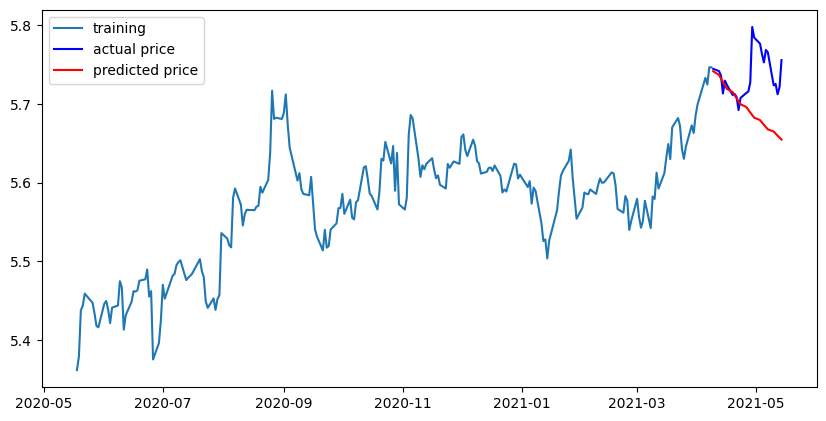

```
MSE:  329.62153321648907
MAE:  13.467205281419698
RMSE:  18.155482180776392
MAPE: 4.27%
```


<br><br>

#### Apple
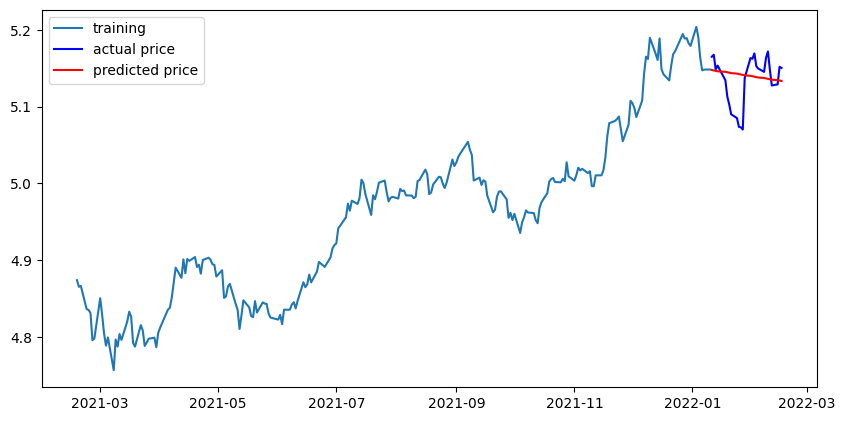
```
MSE:  31.939000740578532
MAE:  4.465609729331935
RMSE:  5.651460053877983
MAPE: 2.68%
```

위 결과를 살펴보면 두 종목에서 모두 MAPE가 15% 이하로 나오는 것을 확인할 수 있다.

# 회고

## 1. 모델에 대한 평가
---
이번 프로젝트트 Yahoo Finance 로 부터 불러온 데이터를 바탕으로 주가를 예측하는 프로젝트이다. 삼성전자의 2020년 5월부터 2021년 5월까지의 데이터셋을 이용한 프로젝트를 진행한 후 같은 방식으로 애플과 메타에 대한 주가를 예측하였다. ARIMA 모수를 찾는 과정에 대해서는 상술하였으며 이를 파라미터로 한 학습 결과 모두 MAPE가 15% 미만인 것을 확인할 수 있었다.
<br><br>
다만 이것이 주가를 정확하게 예측하고 있는 것인가에 대해서는 여전히 의문이 남는다. Apple의 경우 테스트의 마지막 부분에선 주가가 어느정도 비슷해졌지만 초반의 하락은 예측하지 못했고, META의 경우에는 초반의 하락은 예측하였으나 그 이후의 결과는 실제 주가와는 많이 다른 결과였던 것 같다.

## 2. 후기
---
이번 프로젝트를 진행하면서 통계공부에 대한 필요성을 느꼈다. 오늘 진행한 시계열 프로젝트의 경우 CV, NLP에 따로 포함되어 있는 것 같아 보이지는 않는데 꽤 흥미로웠던 프로젝트였다. 다만 통계적인 지식이 포함된(노드에서 진행한대로 간단하게 넘어가는 방법도 있겠지만) ARIMA 같은 경우 이 개념에 대한 자세한 지식이 있어야 정확하게 모델을 설계할 수 있을 것 같다라는 생각이 들었다.
<br><br>
여담으로 Apple은 최근의 주가를 데이터셋으로 사용한 반면 META는 최근 Earning Shock 를 맞아 주가가 폭락하여 당연하게도(?) 예측이 제대로 되지 않았다. 아무리 정교한 모델이라도 과거의 데이터인 시계열 데이터를 이용하는 주가예측 모델은 이러한 급등에 대한 예측은 거의 불가능한 것이 아닐까 생각이 들었다.

## 3. Reference

https://leedakyeong.tistory.com/entry/ARIMA%EB%9E%80-ARIMA-%EB%B6%84%EC%84%9D%EA%B8%B0%EB%B2%95-AR-MA-ACF-PACF-%EC%A0%95%EC%83%81%EC%84%B1%EC%9D%B4%EB%9E%80